# Analyze results of CPD perf.
Both energy and accuracy results

In [ ]:
import os
import numpy as np


csv_folder = "./datasets/csv"
# get multivaritae datasets from the csv folder
multi_datasets = ['occupancy', 'run_log', 'apple', 'bee_waggle_6']
multi_datasets.sort()
print(multi_datasets)

# univariate datasets are in the datasets folder
univariate_files = os.listdir(csv_folder)
univariate_datasets = [f.split('.')[0] for f in univariate_files]
univariate_datasets = [f for f in univariate_datasets if f not in multi_datasets]
print(len(univariate_datasets))
univariate_datasets.sort()
print(univariate_datasets)

# num of all watch verions
watch_count = 39
uni_count = len(univariate_datasets)


['apple', 'bee_waggle_6', 'occupancy', 'run_log']
38
['bank', 'bitcoin', 'brent_spot', 'businv', 'centralia', 'children_per_woman', 'co2_canada', 'construction', 'debt_ireland', 'gdp_argentina', 'gdp_croatia', 'gdp_iran', 'gdp_japan', 'global_co2', 'homeruns', 'iceland_tourism', 'jfk_passengers', 'lga_passengers', 'measles', 'nile', 'ozone', 'quality_control_1', 'quality_control_2', 'quality_control_3', 'quality_control_4', 'quality_control_5', 'rail_lines', 'ratner_stock', 'robocalls', 'scanline_126007', 'scanline_42049', 'seatbelts', 'shanghai_license', 'uk_coal_employ', 'unemployment_nl', 'us_population', 'usd_isk', 'well_log']


## Univariate datasets

In [158]:
# analysis of univariate datasets
def get_accuracy_results(algorithm, version=-1, multi=False):
    # aggregate results from all univariate datasets
    accuracy_result_folder = "./results/pi_accuracy"
    # read all the results for f1 
    algo_name = algorithm.lower()
    if version == -1:
        result_file = os.path.join(accuracy_result_folder, algo_name + ".csv")
    else:
        result_file = os.path.join(
            accuracy_result_folder, algo_name + "_v" + str(version) + ".csv"
        )
    f1 = np.zeros(len(univariate_datasets))
    with open(result_file, "r") as f:
        # skip first line
        f.readline()
        for line in f:
            if not multi:
                if line.split(",")[0] in multi_datasets:
                    continue
            line = line.strip().split(",")
            cur_f1 = float(line[1])
            dataset_name = line[0]
            # find position to insert
            pos = -1
            for i in range(len(f1)):
                if univariate_datasets[i] == dataset_name:
                    pos = i
                    f1[pos] = cur_f1
                    break
            if pos == -1:
                exit("Dataset not found")
    return f1
            

In [159]:
cusum_f1 = get_accuracy_results("CUSUM")

bocpd_f1 = get_accuracy_results("BOCPD")
bocpdms_f1 = get_accuracy_results("BOCPDMS")

pelt_f1 = get_accuracy_results("PELT")

watch_f1_list = []
for i in range(0, 39):
    r = get_accuracy_results("WATCH", i)
    watch_f1_list.append(r)
    


In [160]:
print(cusum_f1)
print(watch_f1_list[6])

[0.22222222 0.35481172 0.4749709  0.1754386  0.7628866  0.50789096
 0.56198347 0.57352941 0.46938776 0.88888889 0.82352941 0.49152542
 1.         0.75362319 0.58215962 0.66666667 0.43678161 0.2831216
 0.07964602 0.58333333 0.53125    0.28571429 0.54545455 0.5
 0.40236686 0.66666667 0.53658537 0.328125   0.8        0.42156564
 0.31338963 0.32142857 0.55882353 0.51327434 0.60714286 0.08602151
 0.66134663 0.19160728]
[1.         0.76641041 0.66253102 0.62962963 0.90909091 0.68076923
 0.83392815 0.96551724 0.95833333 0.88888889 1.         0.86792453
 1.         0.92857143 0.87323944 0.8        0.7755102  0.87955182
 0.94736842 1.         0.96551724 1.         1.         1.
 0.7804878  1.         0.96551724 0.84615385 1.         0.70620314
 0.87373591 0.97435897 0.96551724 0.51327434 0.87640449 0.66666667
 0.84836852 0.93054726]


In [161]:

def get_energy_results(algorithm, version=-1, multi=False):
    # aggregate results from all univariate datasets
    accuracy_result_folder = "./results/pi_energy"
    # read all the results for f1 and cover, then sum them up
    # return the sum
    algo_name = algorithm.lower()
    if version==-1:
        result_file = os.path.join(accuracy_result_folder, algo_name + ".csv")
    else:
        result_file = os.path.join(accuracy_result_folder, algo_name + "_v" + str(version) + ".csv")
    if multi:
        energy = np.zeros(len(multi_datasets))
    else:
        energy = np.zeros(len(univariate_datasets))
        
    with open(result_file, 'r') as f:
        # skip first line
        f.readline()
        for line in f:
            if not multi:
                if line.split(',')[0] in multi_datasets:
                    continue
                    
            line = line.strip().split(',')
            cur_energy = float(line[2])
            dataset_name = line[0]
            # find position to insert
            pos = -1
            for i in range(len(energy)):
                if multi:
                    if multi_datasets[i] == dataset_name:
                        pos = i
                        energy[pos] = cur_energy
                        break
                else:
                    if univariate_datasets[i] == dataset_name:
                        pos = i
                        energy[pos] = cur_energy
                        break
            if pos == -1:
                exit('Dataset not found')
    return energy

In [162]:

cusum_energy = get_energy_results("CUSUM")


# bocpd_results = get_accuracy_results("BOCPD")
bocpd_energy = get_energy_results("BOCPD")

pelt_energy = get_energy_results("PELT")

bocpdms_energy = get_energy_results("BOCPDMS")

watch_energy_list = []
for i in range(0, 39):
    r = get_energy_results("WATCH", i)
    watch_energy_list.append(r)
    

In [163]:
print(cusum_energy)
print(watch_energy_list[6])
print(watch_energy_list[27])

[0.04502989 0.0495617  0.03226329 0.01404371 0.00013812 0.01198012
 0.00835198 0.01698558 0.00018933 0.00173831 0.00021826 0.00246125
 0.00168393 0.00398088 0.00508786 0.01161467 0.04041675 0.0287611
 0.05053008 0.00584541 0.00295388 0.02426988 0.02993675 0.04252859
 0.04077624 0.03831674 0.00145341 0.02980922 0.00179292 0.02642365
 0.02952644 0.01220557 0.01243991 0.0097116  0.01352658 0.03366498
 0.01543565 0.08513527]
[0.03949686 0.03996618 0.13702355 0.06070155 0.00105045 0.12470601
 0.02355027 0.2002664  0.00207118 0.00403285 0.00139618 0.01568133
 0.00302844 0.0184816  0.04968015 0.01155848 0.04864507 0.29469945
 0.07587016 0.01206018 0.00390827 0.02125585 0.02482628 0.03470498
 0.02578983 0.0179083  0.00463471 0.04624268 0.01536583 0.02581097
 0.11924459 0.03530916 0.04361071 0.01021087 0.11164254 0.12722433
 0.01702921 0.21682523]
[0.02204295 0.02389352 0.01520346 0.02641843 0.00169321 0.02152562
 0.00808557 0.04363179 0.00321059 0.0031305  0.00208133 0.01318275
 0.00702296 0.0

In [164]:
def ranking(array, order = "ascending"):
    # get the ranking of the array, from 1 to n, store in a numpy array, in the same order
    if order == "ascending":
        idx = np.argsort(array)
    elif order == "descending":
        idx = np.argsort(-array)
    else:
        exit("Invalid order")
    rank = np.empty(len(array), int)
    rank[idx] = np.arange(len(array))
    return rank + 1
    

# test ranking
test_data = np.random.rand(10)
print(test_data)
print(ranking(test_data, "descending"))
print(ranking(test_data, "ascending"))


[0.35476694 0.93140005 0.63470758 0.20971585 0.70448803 0.9496509
 0.26326604 0.48793024 0.21303814 0.30104895]
[ 6  2  4 10  3  1  8  5  9  7]
[ 5  9  7  1  8 10  3  6  2  4]


In [165]:
# for all versions of WATCH, rank them based on f1 , then sum the ranks
watch_f1_rankings = np.zeros((39, len(univariate_datasets)))
for i in range(len(univariate_datasets)):
    cur_data = np.zeros(39)
    for j in range(39):
        cur_data[j] = watch_f1_list[j][i]
    cur_ranking = ranking(cur_data, "descending")
    watch_f1_rankings[:, i] = cur_ranking

# for all versions of WATCH, rank them based on energy, then sum the ranks
watch_energy_rankings = np.zeros((39, len(univariate_datasets)))
for i in range(len(univariate_datasets)):
    cur_data = np.zeros(39)
    for j in range(39):
        cur_data[j] = watch_energy_list[j][i]
    cur_ranking = ranking(cur_data, "ascending")
    watch_energy_rankings[:, i] = cur_ranking

    


In [166]:
watch_f1_avg_rank = np.mean(watch_f1_rankings, axis=1)
watch_energy_avg_rank = np.mean(watch_energy_rankings, axis=1)
print(watch_f1_avg_rank.shape)
print(watch_energy_avg_rank.shape)

(39,)
(39,)


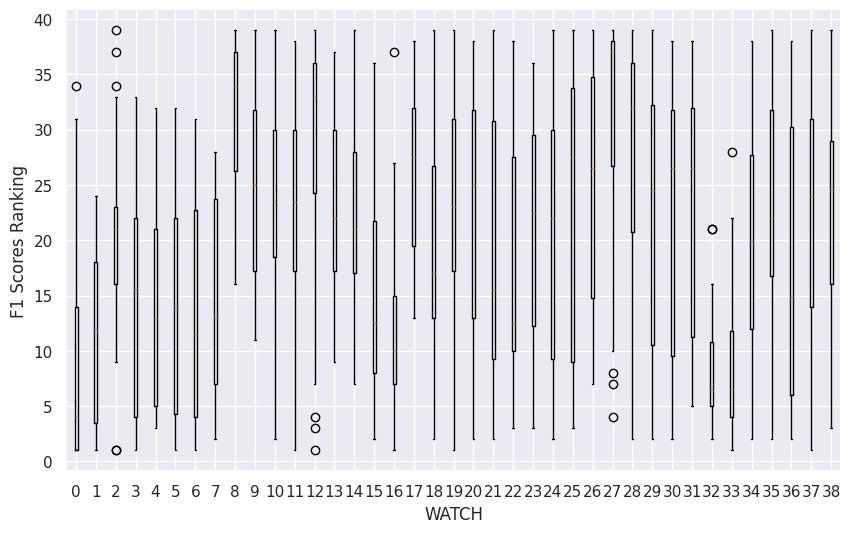

In [167]:
# box plot of f1 score rankings for WATCH
data = watch_f1_rankings
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i in range(39):
    plt.boxplot(data[i], positions=[i])
plt.xlabel("WATCH")
plt.ylabel("F1 Scores Ranking")

plt.show()


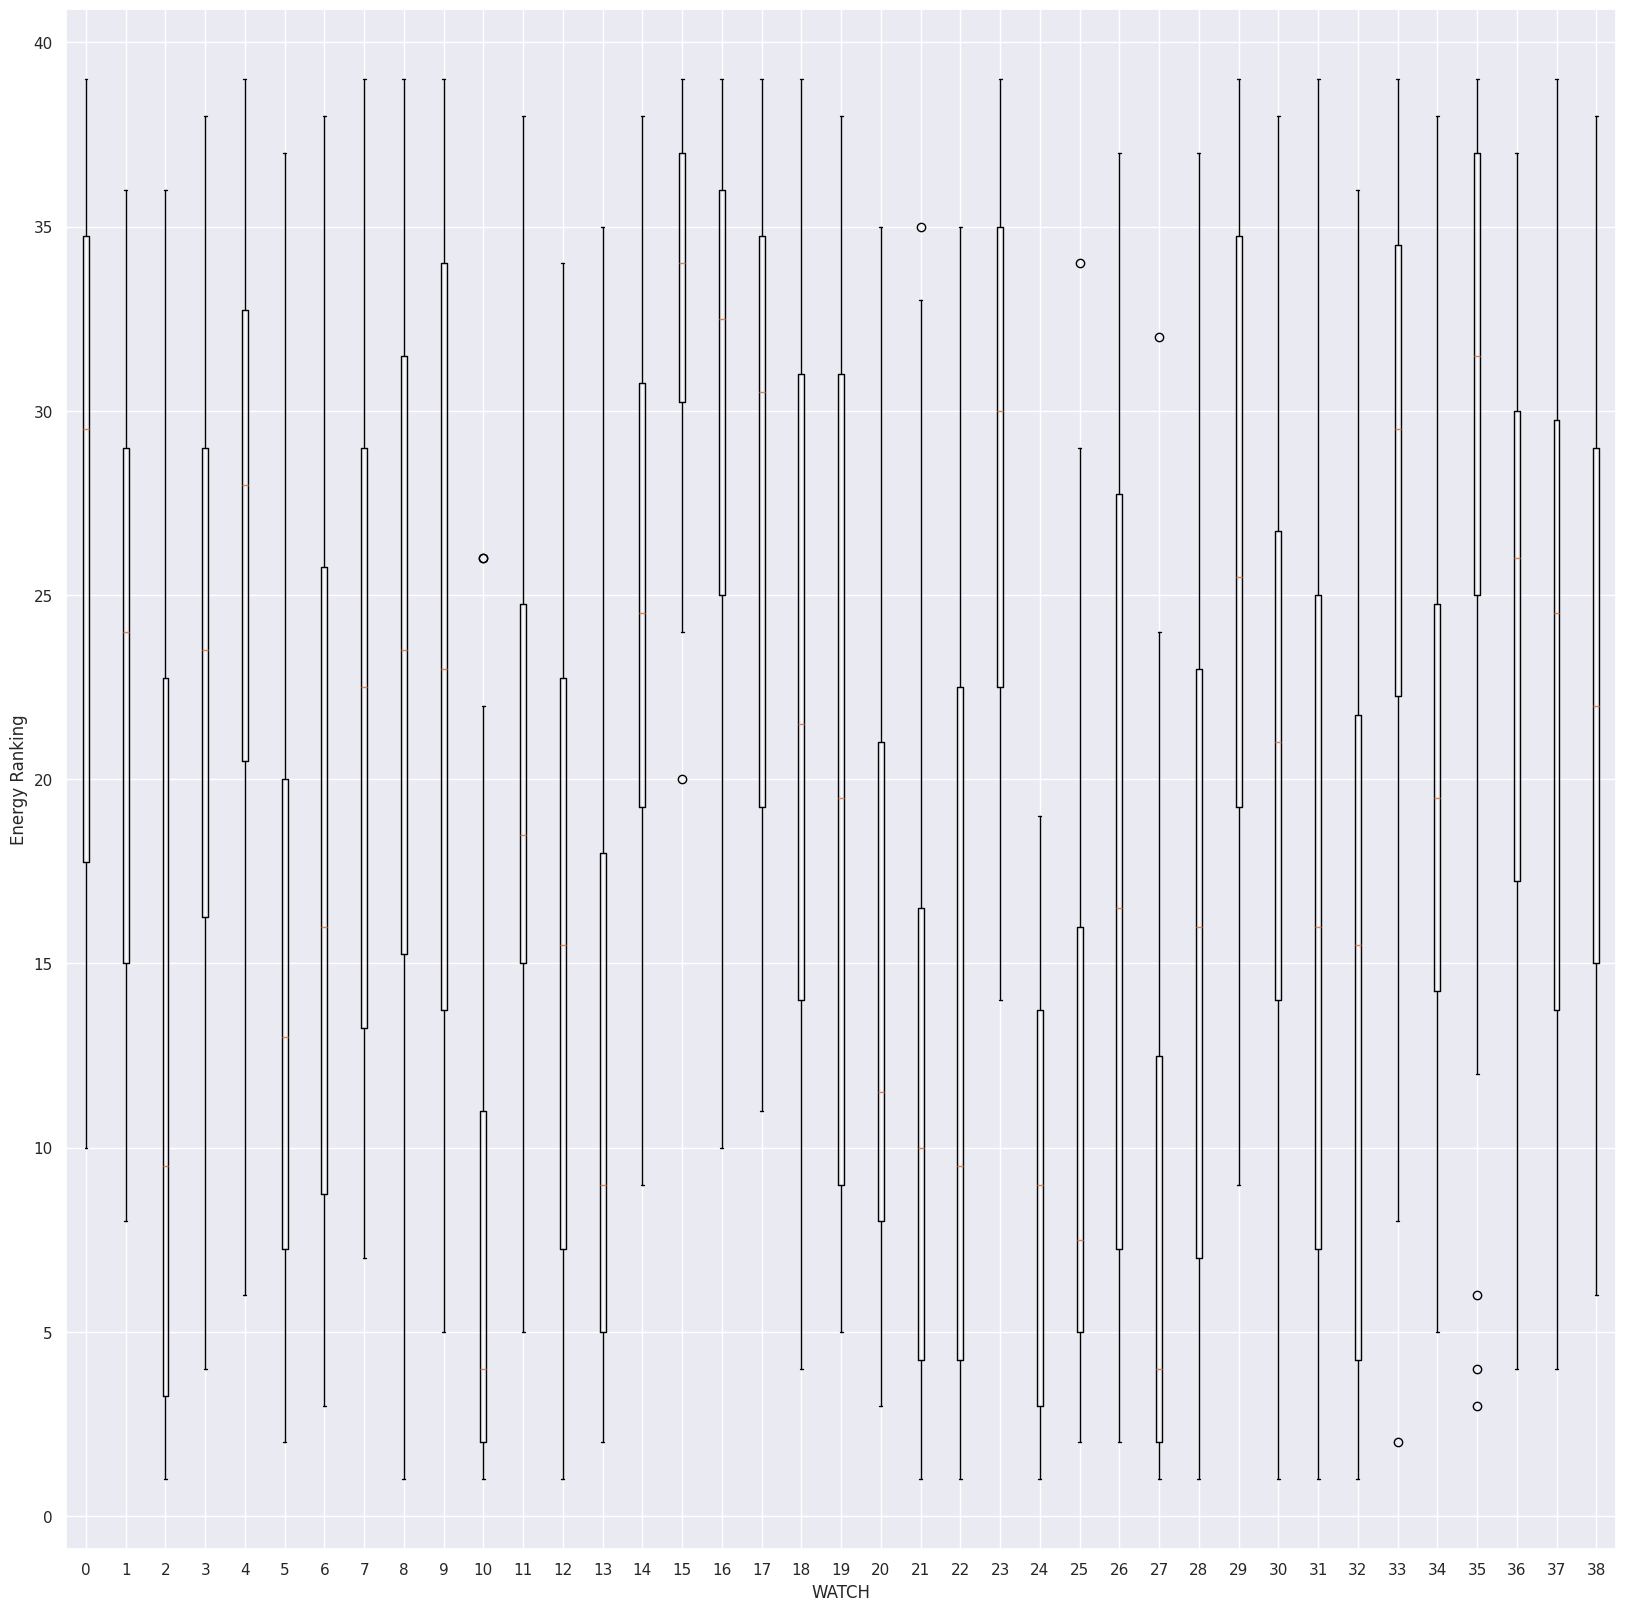

In [168]:
# box plot of energy rankings for WATCH
data = watch_energy_rankings
import matplotlib.pyplot as plt
for i in range(39):
    plt.boxplot(data[i], positions=[i])
plt.xlabel("WATCH")
plt.ylabel("Energy Ranking")    
plt.show()

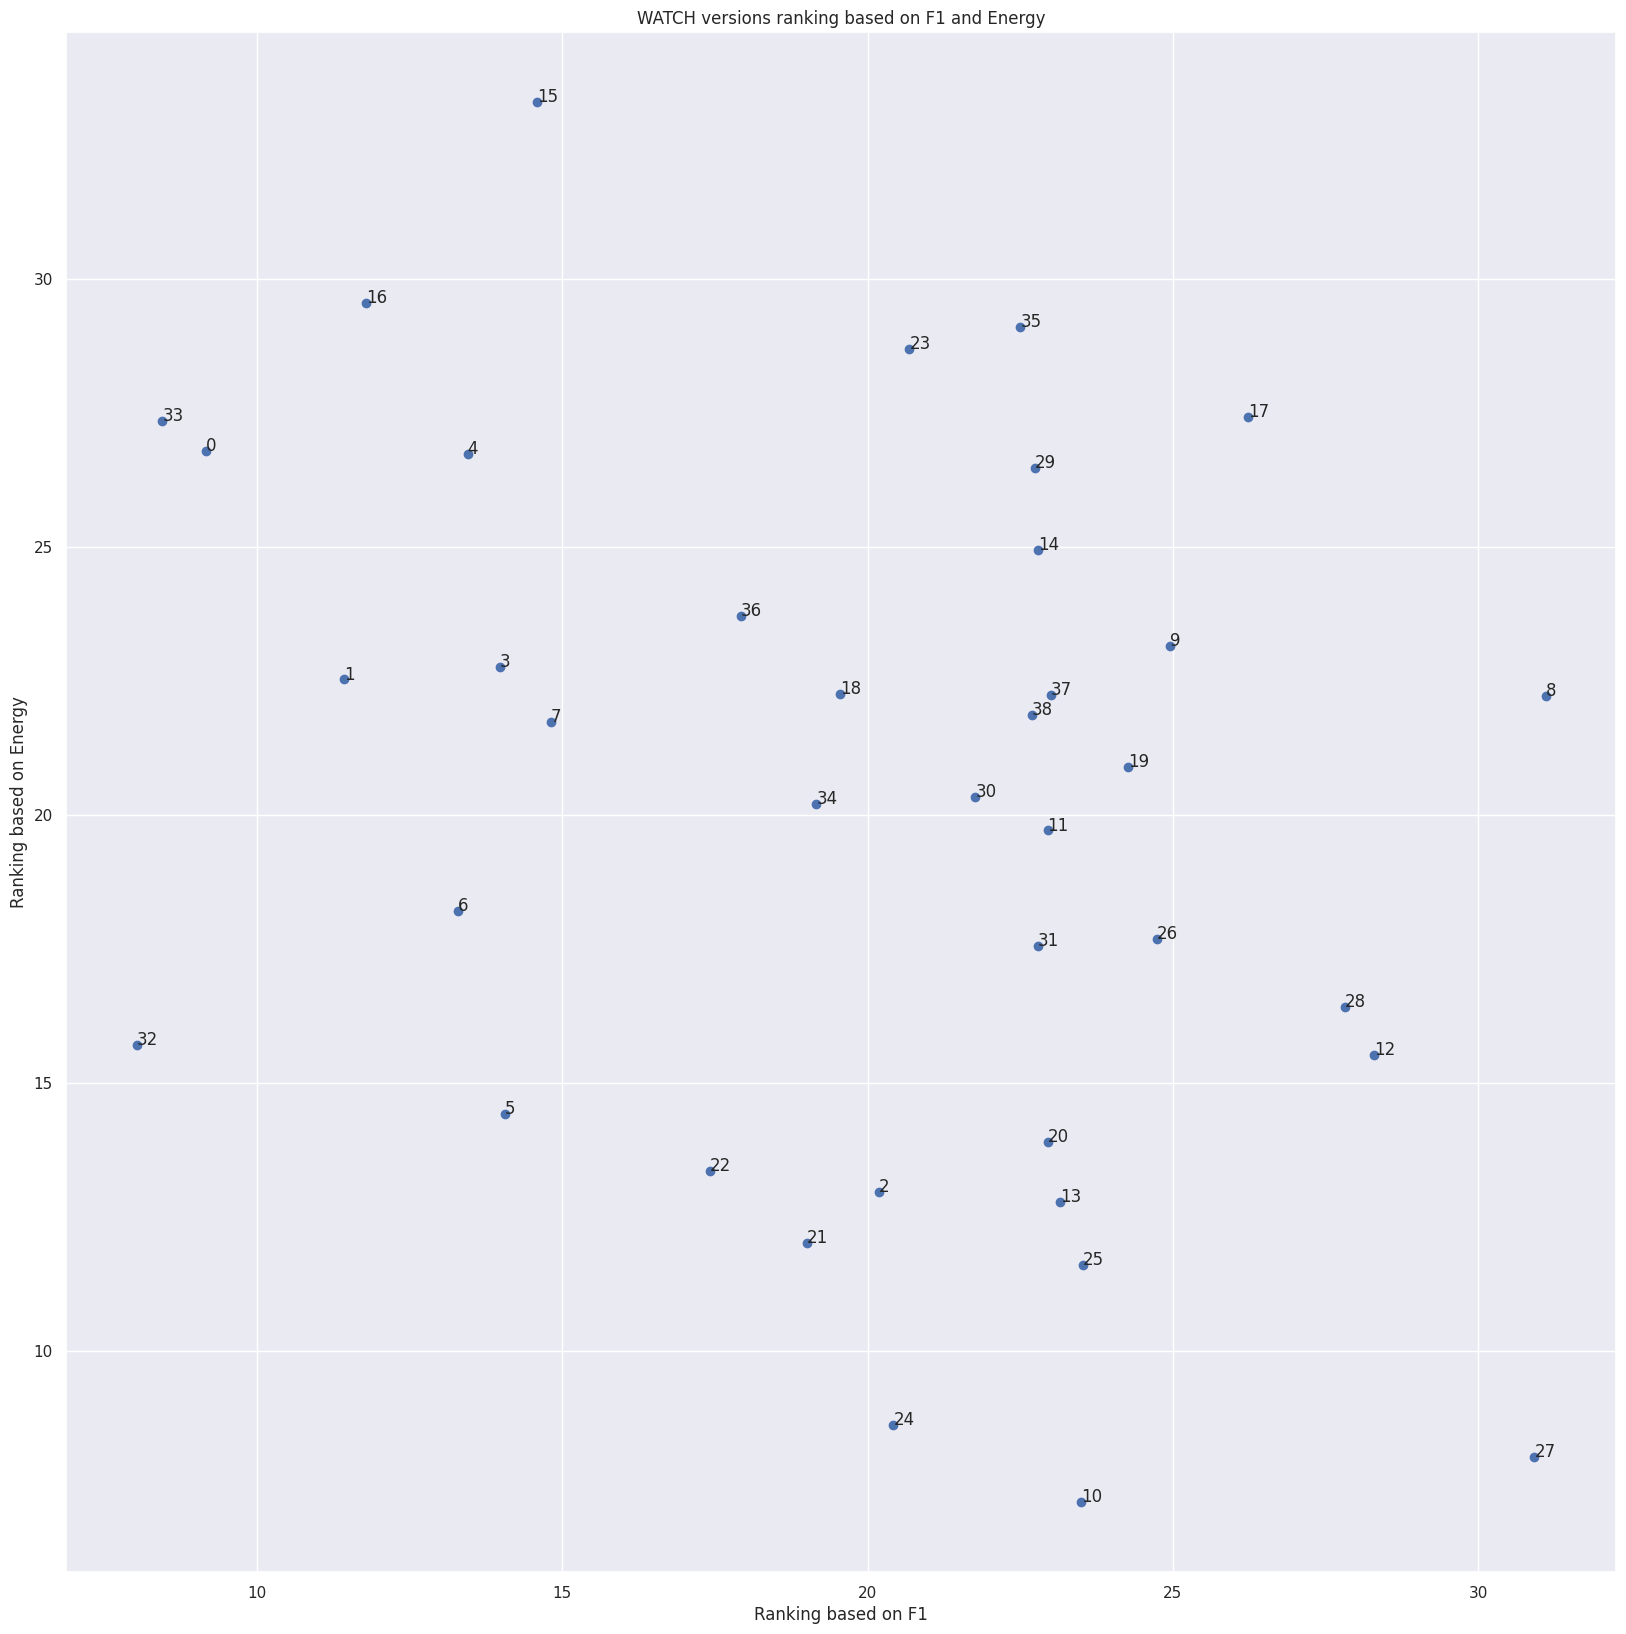

In [169]:
# plot the ranking of all watch versions, based on f1 and energy
import matplotlib.pyplot as plt

# scatter plot of f1 and energy
fig, ax = plt.subplots()
ax.scatter(watch_f1_avg_rank, watch_energy_avg_rank)
for i in range(39):
    ax.annotate(str(i), (watch_f1_avg_rank[i], watch_energy_avg_rank[i]))
plt.xlabel("Ranking based on F1")
plt.ylabel("Ranking based on Energy")
plt.title("WATCH versions ranking based on F1 and Energy")
plt.show()

In [170]:
# pareto front analysis of all WATCH versions
pareto_front = []
for i in range(39):
    cur_f1 = watch_f1_avg_rank[i]
    cur_energy = watch_energy_avg_rank[i]
    dominated = False
    for j in range(39):
        if i == j:
            continue
        if watch_f1_avg_rank[j] <= cur_f1 and watch_energy_avg_rank[j] <= cur_energy:
            dominated = True
            break
    if not dominated:
        pareto_front.append(i)
print(pareto_front)



[5, 10, 21, 22, 24, 32]


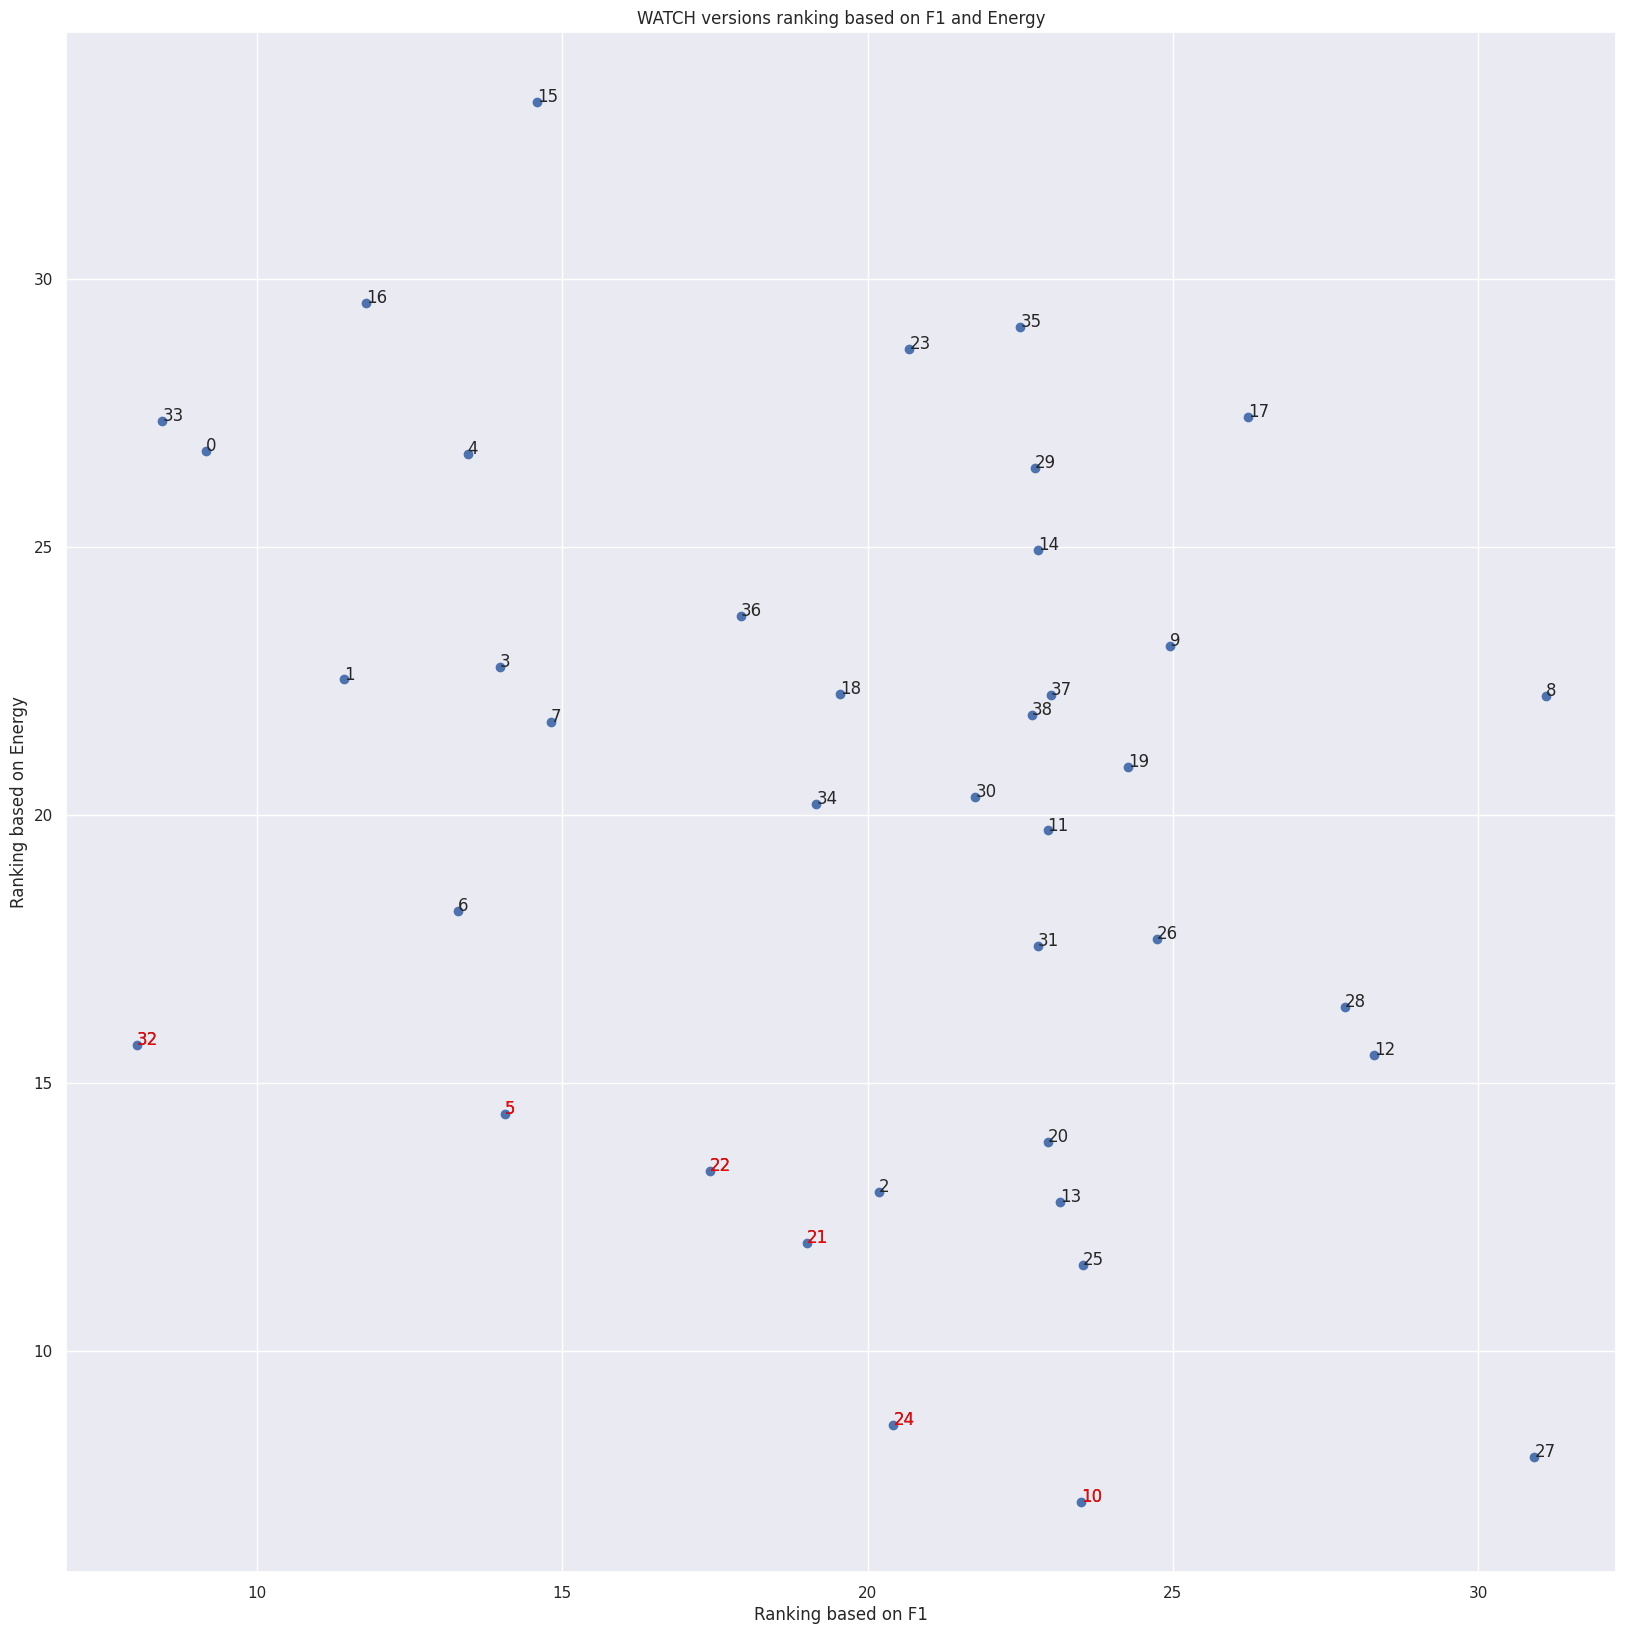

In [171]:
# plot the pareto front
fig, ax = plt.subplots()
ax.scatter(watch_f1_avg_rank, watch_energy_avg_rank)    
for i in range(39):
    ax.annotate(str(i), (watch_f1_avg_rank[i], watch_energy_avg_rank[i]))
for i in pareto_front:
    ax.annotate(str(i), (watch_f1_avg_rank[i], watch_energy_avg_rank[i]), color='red')
plt.xlabel("Ranking based on F1")
plt.ylabel("Ranking based on Energy")
plt.title("WATCH versions ranking based on F1 and Energy")
plt.show()

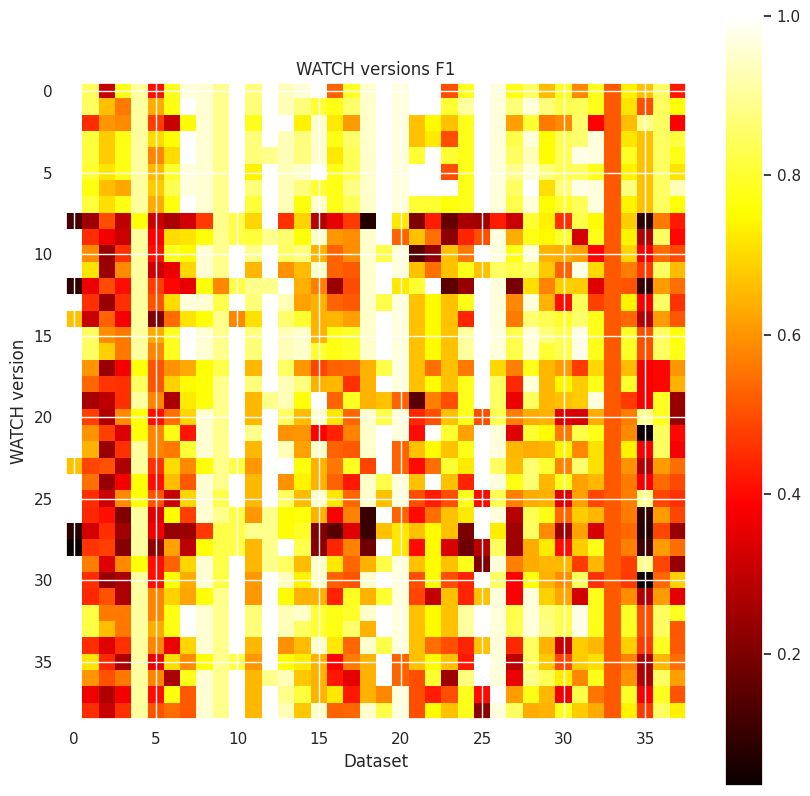

In [172]:
# heatmap of all watch versions f1
# change color scheme
# make  the image larger
fig = plt.figure(figsize=(10, 10))
plt.imshow(watch_f1_list, cmap='hot')
plt.colorbar() 
plt.xlabel("Dataset")
plt.ylabel("WATCH version")
plt.title("WATCH versions F1")
plt.show()


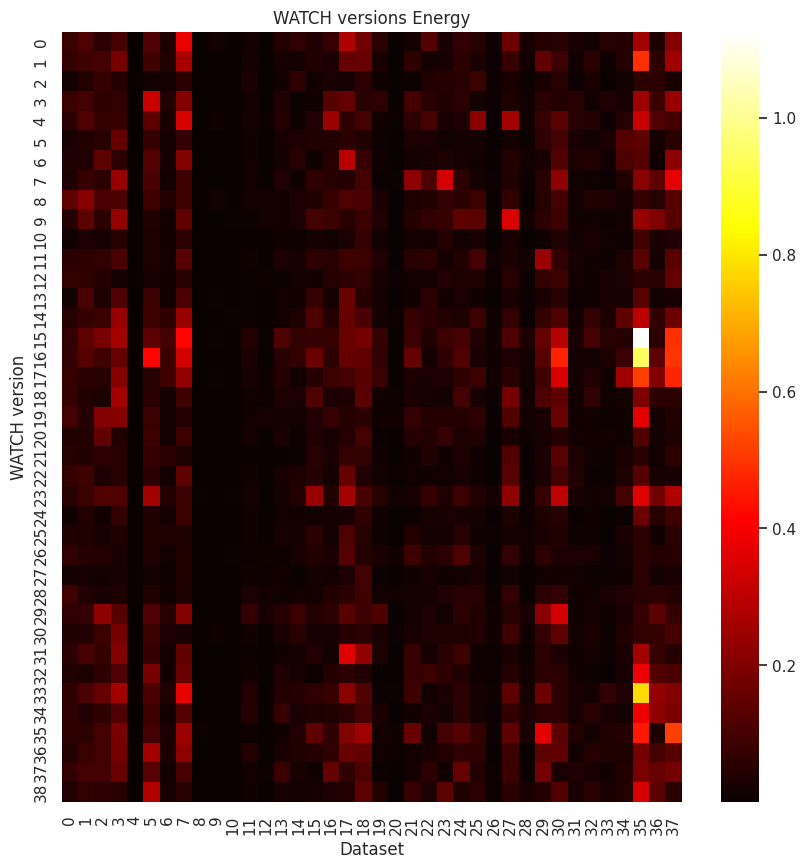

In [174]:
# watch energy heatmap, using seaborn
import seaborn as sns
fig = plt.figure(figsize=(10, 10))
sns.heatmap(watch_energy_list, cmap='hot')
plt.xlabel("Dataset")
plt.ylabel("WATCH version")
plt.title("WATCH versions Energy")
plt.show()
